In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

# from random import gauss
# from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('./data/kc_house_data.csv')

# Listing out column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Converting column `date` to datetime64[ns] from type string/object
df['date'] = df['date'].astype('datetime64[ns]')

In [5]:
df_copy = df.copy()

In [6]:
df_copy['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [7]:
df_copy = df_copy.sort_values(by=['id', 'date'])
df_copy = df_copy.drop_duplicates(subset=['id'], keep='last')

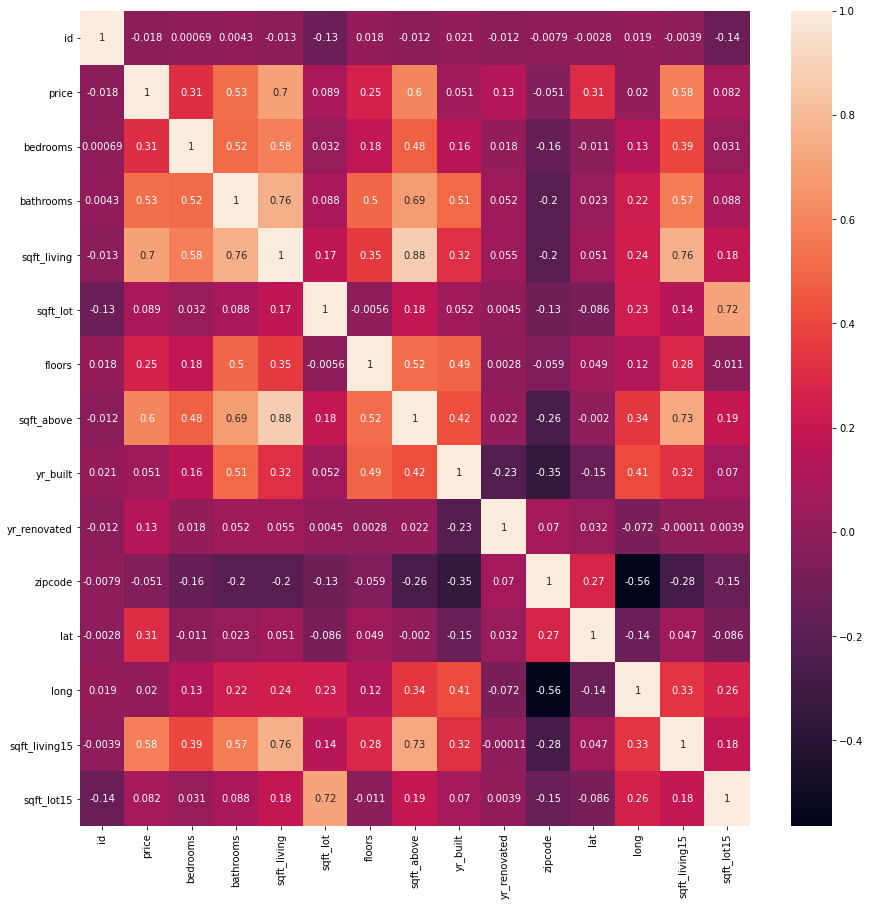

In [8]:
#looking at correlations
fig, ax = plt.subplots(figsize=(15,15))
heat = sns.heatmap(df_copy.corr(), annot = True)

In [9]:
df_copy.groupby('view').mean()

df_copy.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
3910,9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,YES,AVERAGE,Average,11 Excellent,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9245,9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
4407,2470100110,2014-08-04,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13 Mansion,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
1446,8907500070,2015-04-13,5350000.00,5,5.00,8000,23985,2.00,NO,EXCELLENT,Average,12 Luxury,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,7999600180,2014-05-29,83000.00,2,1.00,900,8580,1.00,NO,NONE,Average,5 Fair,900,0.0,1918,0.00,98168,47.47,-122.27,2060,6533
2139,1623049041,2014-05-08,82500.00,2,1.00,520,22334,1.00,NO,NONE,Fair,5 Fair,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570
16184,3028200080,2015-03-24,81000.00,2,1.00,730,9975,1.00,NaN,NONE,Poor,5 Fair,730,0.0,1943,0.00,98168,47.48,-122.31,860,9000
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4 Low,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500


In [10]:
# Dropping irrelevant columns
df_copy.drop(columns = ['id', 'floors', 'waterfront', 'date',
                        'lat', 'long', 'condition', 'yr_renovated',
                         'sqft_lot15','sqft_above', 'sqft_living15',
                         'sqft_basement', 'zipcode', 'yr_built'],
                        inplace=True)

In [11]:
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
2495,300000.00,6,3.00,2400,9373,NONE,7 Average
6729,647500.00,4,1.75,2060,26036,NONE,8 Good
8404,400000.00,3,1.00,1460,43000,NONE,7 Average
8800,235000.00,3,1.00,1430,7599,NONE,6 Low Average
3553,402500.00,4,2.00,1650,3504,NONE,7 Average


In [12]:
df_copy.grade = [x.replace(" ", "_").strip() for x in df_copy.grade]

In [13]:
#previous run showed a fan like residual shape and that there's a pattern so we are transform
#df_copy['price'] = np.log(df_copy['price'])

In [14]:
# Establishing target and predictor variables
df_copy = df_copy[df_copy['grade'] != '3 Poor']

In [15]:
df_copy = df_copy[df_copy['bedrooms'] != 33] #

In [16]:
df_copy.bedrooms = df_copy.bedrooms.astype(str)

In [17]:
df_copy.bathrooms  = df_copy.bathrooms.astype(str)

In [18]:
#df_copy.zipcode = df_copy.zipcode.astype(str)

In [19]:
df_copy = df_copy.dropna(subset = ['view'])

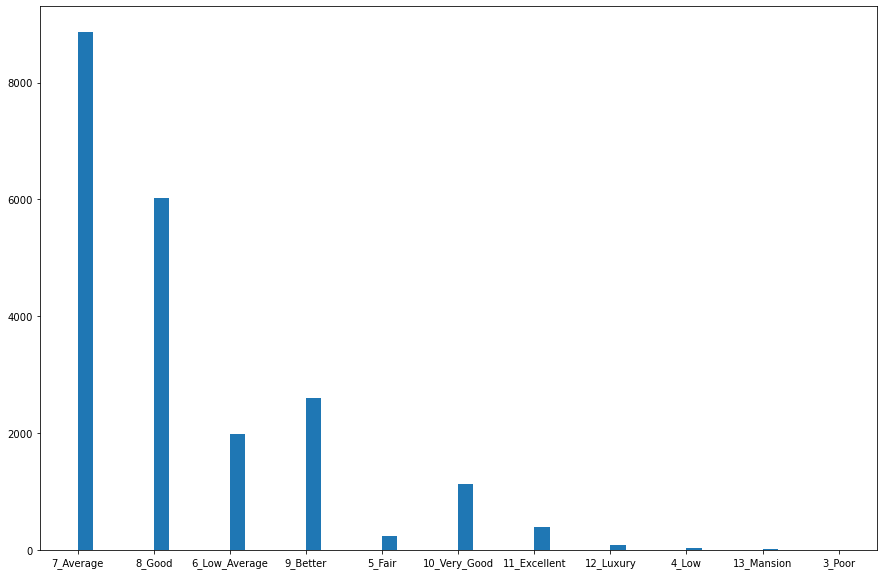

In [27]:
fig, ax = plt.subplots(figsize = (15, 10))

ax.hist(df_copy['grade'], bins = 50);

In [37]:
fig, ax = plt.subplots(figsize = (15, 10))

ax.barh(df_copy['grade'], width = df_copy['price']);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000029BE8E62CA0> (for post_execute):


KeyboardInterrupt: 

In [21]:
df_copy.describe()

,price,sqft_living,sqft_lot
count,21356.00,21356.00,21356.00
mean,541620.55,2082.66,15119.66
std,366247.73,918.16,41499.47
min,78000.00,370.00,520.00
25%,324950.00,1430.00,5040.00
50%,450000.00,1920.00,7613.50
75%,645000.00,2550.00,10696.25
max,7700000.00,13540.00,1651359.00


There is a max of $7.7 mil house 

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


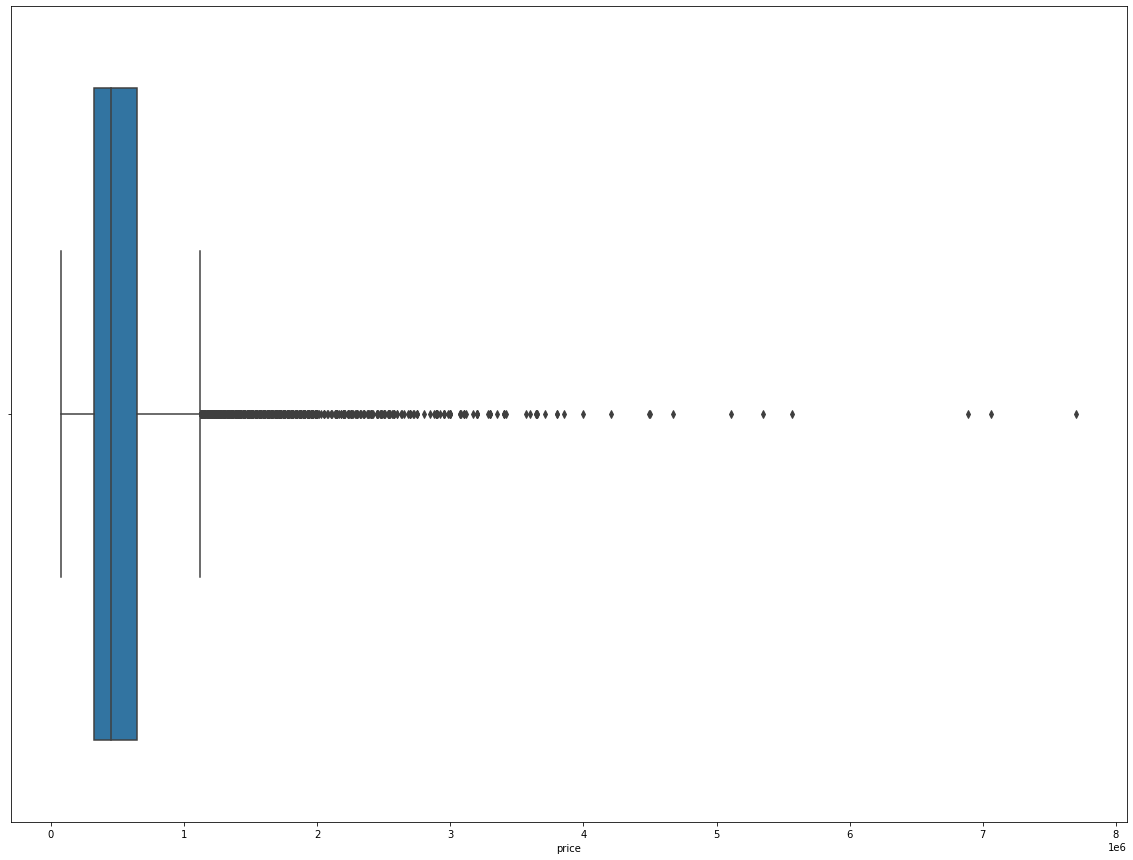

In [31]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.boxplot(df_copy['price']);

In [ ]:
#mean IQR 
q3, q1 = np.percentile(df_copy['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit = df_copy['price'].mean()- (iqr*1.5)

upper_limit = df_copy['price'].mean()+ (iqr*1.5)

lower_limit, upper_limit

In [35]:
#Finding where our outliers are in terms of how far they are from the IQR
#using median here because mean takes the 
q3, q1 = np.percentile(df_copy['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit = df_copy['price'].median()- (iqr*1.5)

upper_limit = df_copy['price'].median()+ (iqr*1.5)

lower_limit, upper_limit

(-30075.0, 930075.0)

In [36]:
df_copy[(df_copy['price'] >  930075)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
4739,1490000.00,5,3.5,3620,7821,AVERAGE,10_Very_Good
5235,1040000.00,5,2.75,3050,8904,NONE,8_Good
216,1510000.00,5,3.0,3300,33474,GOOD,9_Better
11661,1730000.00,5,3.5,5000,26540,GOOD,10_Very_Good
17966,2030000.00,4,3.75,4100,22798,GOOD,11_Excellent
...,...,...,...,...,...,...,...
19742,2250000.00,3,3.25,3890,3452,NONE,12_Luxury
19651,1450000.00,4,3.5,2860,2199,NONE,10_Very_Good
4807,2480000.00,5,3.75,6810,7500,NONE,13_Mansion
11912,1440000.00,4,3.0,3720,5000,NONE,9_Better


In [34]:
df_copy[(df_copy['price'] >  1021695)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
4739,1490000.00,5,3.5,3620,7821,AVERAGE,10_Very_Good
5235,1040000.00,5,2.75,3050,8904,NONE,8_Good
216,1510000.00,5,3.0,3300,33474,GOOD,9_Better
11661,1730000.00,5,3.5,5000,26540,GOOD,10_Very_Good
17966,2030000.00,4,3.75,4100,22798,GOOD,11_Excellent
...,...,...,...,...,...,...,...
18640,1390000.00,3,1.25,2400,6653,AVERAGE,11_Excellent
19742,2250000.00,3,3.25,3890,3452,NONE,12_Luxury
19651,1450000.00,4,3.5,2860,2199,NONE,10_Very_Good
4807,2480000.00,5,3.75,6810,7500,NONE,13_Mansion


# SPLIT

In [ ]:
X = df_copy.drop(columns = 'price')

In [ ]:
y = df_copy.price

In [ ]:
# Creating variables for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [ ]:
# Did it split correctly?
len(X_train + X_test) == len(X)

In [ ]:
simple_model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()

In [ ]:
simple_model.summary()

In [ ]:
# Get our predictions!
simple_train_preds = simple_model.predict(sm.add_constant(X_train['sqft_living']))
simple_train_preds

In [ ]:
# Can now predict for our test set!
simple_test_preds = simple_model.predict(sm.add_constant(X_test['sqft_living']))
simple_test_preds

In [ ]:
####THIS IS THE SKLEARN WAY OF GETTING THE R2 COMPARED TO STATSMODEL WHERE IT GIVES US IN THE SUMMARY
r2_score(y_test,simple_test_preds)

In [ ]:
r2_score(y_train,simple_train_preds) #SAME AS THE R-SQUARED IN THE SUMMARY ABOVE FOR TRAIN

In [ ]:
# Just looking at two variables

# Plot our points, rating vs balance, as a scatterplot
plt.scatter(train_df['sqft_living'], train_df['price'])

# Plot the line of best fit!
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')

plt.ylabel('Sale Price')
plt.xlabel('Squarefoot Living Area')
plt.title('Relationship between Squarefoot Living Area and Sale Price')
plt.show()

In [ ]:
#THIS IS TESTING 
# One last thing - can visualize both train and test set!

# Plot our training data
plt.scatter(train_df['sqft_living'], train_df['price'], color='blue', label='Training')
# Plot our testing data
plt.scatter(test_df['sqft_living'], test_df['price'], color='green', label='Testing')


# Plot the line of best fit
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')
# Plotting for the test data just to show it's the same!
plt.plot(test_df['sqft_living'], simple_test_preds, color='red')

plt.ylabel('Sale Price')
plt.xlabel('Square Foot Living Area')
plt.title('Relationship between Sale Price and Square Foot Living Area')
plt.legend()
plt.show()

# Statistical Analysis on Train_DF

In [ ]:
summary_of_view = df_copy.groupby('view').agg(['mean', 'std'])

summary_of_view

In [ ]:
# Figure out how to do this in a loop/function?
df_average = train_df[train_df['view'] == 'AVERAGE']
df_excellent = train_df[train_df['view'] == 'EXCELLENT']
df_fair = train_df[train_df['view'] == 'FAIR']
df_good = train_df[train_df['view'] == 'GOOD']
df_none = train_df[train_df['view'] == 'NONE']

In [ ]:
train_df['view'].value_counts()

In [ ]:
fvalue, pvalue = stats.f_oneway(df_average['price'], df_excellent['price'], df_fair['price'],
                                df_good['price'] , df_none['price'])

In [ ]:
train_df.grade.value_counts()

In [ ]:
# Dropping poor row, since there is only one
df3 = train_df.copy()

In [ ]:
df3.head()

In [ ]:
df3['grade'].value_counts()

In [ ]:
# Might need a for loop or a function here
df_10 = train_df[train_df['grade'] == '10_Very_Good']
df_11 = train_df[train_df['grade'] == '11_Excellent']
df_12 = train_df[train_df['grade'] == '12_Luxury']
df_4 = train_df[train_df['grade'] == '4_Low']
df_5 = train_df[train_df['grade'] == '5_Fair']
df_6 = train_df[train_df['grade'] == '6_Low_Average']
df_7 = train_df[train_df['grade'] == '7_Average']
df_8 = train_df[train_df['grade'] == '8_Good']
df_9 = train_df[train_df['grade'] == '9_Better']

In [ ]:
# Finding f-statistic and p-value using ANOVA testing

f_value_grade, p_value_grade = stats.f_oneway(df_10['price'], df_11['price'], df_12['price'],
                                              df_4['price'], df_5['price'], df_6['price'],
                                              df_7['price'], df_8['price'], df_9['price'])
p_value_grade

In [ ]:
# Ad-hoc test to determine differeces in price vs. grade

df_grade = train_df[['grade', 'price']]

print(pairwise_tukeyhsd(df_grade['price'], df_grade['grade']))

In [ ]:
df3.view.value_counts()

In [ ]:
df_copy.columns

In [ ]:
#len(df_copy.zipcode.unique())

Dropping the view_Fair because it's not different in term of mean price compared to average, dropping low in grade because it's not significant to some other grades but significant to others.

In [ ]:
df3.info()

# OHE AND SCALING TRAIN AND TEST

In [ ]:
scaler = StandardScaler()

#calling to certain columns
continous = [c for c in df3.columns if (df3[c].dtype == 'int64')| (df3[c].dtype == 'float64')]

ct = ColumnTransformer(transformers=[('scale', scaler, continous)],
                       remainder='passthrough')
ct.fit(df3)

# Transform training data

X_train_scaled = ct.transform(df3)
X_train_scaled

# Scaling  testing data
X_test_scaled = ct.transform(test_df)
X_test_scaled

In [ ]:
scaled_df = pd.DataFrame(X_train_scaled, columns = ct.get_feature_names_out())
X_test_scale = pd.DataFrame(X_test_scaled, columns = ct.get_feature_names_out())

In [ ]:
scaled_df

In [ ]:
scaled_df.columns = [x.replace('scale__', "").replace('remainder__','').strip() for x in scaled_df.columns]
X_test_scale.columns = [x.replace('scale__', "").replace('remainder__','').strip() for x in scaled_df.columns]

In [ ]:
scaled_df.info()

In [ ]:
#Convert to a function or loop
X_test_scale.sqft_living = X_test_scale.sqft_living.astype(float)
X_test_scale.sqft_lot = X_test_scale.sqft_lot.astype(float)
X_test_scale.price = X_test_scale.price.astype(float)

scaled_df.sqft_living = scaled_df.sqft_living.astype(float)
scaled_df.sqft_lot = scaled_df.sqft_lot.astype(float)
scaled_df.price = scaled_df.price.astype(float)

In [ ]:
scaled_df.info()

In [ ]:
cat_cols = [c for c in scaled_df.columns if scaled_df[c].dtype == 'O']

encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct2 = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct2.fit(scaled_df)
X_train_enc = ct2.transform(scaled_df)
X_train_enc

#OHE testing
X_test_enc = ct2.transform(X_test_scale)
X_test_enc

In [ ]:
scaled_p_df = pd.DataFrame(X_train_enc.todense() ,columns= ct2.get_feature_names_out(), index = y_train.index)
scaled_test_df= pd.DataFrame(X_test_enc.todense(), columns= ct2.get_feature_names_out(), index = y_test.index)

In [ ]:
scaled_p_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_p_df.columns]
scaled_test_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_test_df.columns]

In [ ]:
scaled_p_df.head()

In [ ]:
scaled_p_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)
scaled_test_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

# No clue but it's only on training data/ Assumption testing?

In [ ]:
fig, ax = plt.subplots()

x = scaled_p_df['sqft_living']
y = scaled_p_df['price']


ax.scatter(x, y);

In [ ]:
np.corrcoef(df['sqft_living'],df['price'])

In [ ]:
# Baseline model
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X = scaled_p_df['sqft_living']
y = scaled_p_df['price']

# Fit
dummy_lr.fit(X,y)

# Score
dummy_lr.score(X,y)

In [ ]:
#Define X and y variable using scaled & parse dataframe

X_s_p = scaled_p_df[['sqft_living']]
y_s_p = scaled_p_df[['price']]

In [ ]:
sk_lr = LinearRegression()
sk_lr.fit(X_s_p, y_s_p)
preds = sk_lr.predict(y_s_p)

preds

In [ ]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]

In [ ]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]


In [ ]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]
resids = y - preds
resids

In [ ]:
#Create out bins

bins = int( len(X)**.5)
bins

In [ ]:
# FIX THIS GRAPH
#Histogram of residuals

plt.hist(resids, bins=bins);

In [ ]:
print(resids.max())
resids.min()

In [ ]:
sns.displot(resids, bins=bins, kde=True)

In [ ]:
sm.qqplot(resids, line='r');

In [ ]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

In [ ]:
plt.scatter(preds, resids);

In [ ]:
#Fit the dummy_regressor

dummy_lr.fit(X_s_p,y_s_p)

In [ ]:
# Score it

dummy_lr.score(X_s_p,y_s_p)

# Train df Modeling

In [ ]:
# Creating a straightforward, initial model --
# just for kicks
simple_formula = 'price ~ sqft_living'
simple_models = ols(formula = simple_formula,
                   data = scaled_p_df).fit()
simple_mod_summ = simple_models.summary()

simple_mod_summ

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

x1 = scaled_p_df[['sqft_living']]
y1 = scaled_p_df[['price']]

# x2 = scaled_and_parse_df[['bedrooms']]

ax[0].scatter(x1, y1)
# ax[1].scatter(x2,y1);

In [ ]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

In [ ]:
simple_formula4 = 'price ~  view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

In [ ]:
simple_formula4 = 'price ~ sqft_living + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

In [ ]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

In [ ]:
no_y_train_df = scaled_p_df.drop(columns = 'price')

In [ ]:
all_var = sm.OLS(y_train, sm.add_constant(no_y_train_df)).fit()
all_var.summary()

In [ ]:
no_bathrooms = no_y_train_df[no_y_train_df.columns.drop(list(no_y_train_df.filter(regex='bathrooms')))]

In [ ]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms)).fit()
all_var.summary()

In [ ]:
no_bathrooms_bedrooms = no_bathrooms[no_bathrooms.columns.drop(\
                                    list(no_bathrooms.filter(regex= 'bedrooms')))]

In [ ]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms_bedrooms)).fit()
all_var.summary()

In [ ]:
no_bathrooms_bedrooms_lot = no_bathrooms_bedrooms.drop(columns = 'sqft_lot')

In [ ]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms_bedrooms_lot)).fit()
all_var.summary()

#### This is all wrong now after fixing errors
No log transformation
- sqft_living = .488
- sqft_living+ view + grade = .593
- view + grade = .535
- sqft_living + grade = .570
- living + view = .517
- view + grade + bedroom + bathroom + living + lot = .614
- view + grade + living + bedrooms + lot = .614
- view + grade + living + lot = .613
- view + grade + living = .612


Post log transformation
- sqft_living = .368
- sqft_living+ view + grade = .571
- view + grade = .535
- sqft_living + grade = .544
- living + view = .414
- view + grade + bedroom + bathroom + living + lot = .592 (bedroom & bathroom are multicollinear)
- view + grade + living + bedrooms + lot = .592 (we get the same adj r-sqr because bedroom & bathroom are multicollinear)
- view + grade + living + lot = .592
- view + grade + living = .591

## Testing Best model on test dataset 

Our simple model appears to under perform our test model by .02.

In [ ]:
#getting the test data to the correct amount of columns through these steps, since our best model was 
#created from a train df that had less columns compared to what we initially started with
test_no_bedroom = scaled_test_df[scaled_test_df.columns.drop(\
                                    list(scaled_test_df.filter(regex= 'bedrooms')))]

In [ ]:
test_no_bed_bath = test_no_bedroom[test_no_bedroom.columns.drop(\
                                    list(test_no_bedroom.filter(regex= 'bathrooms')))]

In [ ]:
test_no_bed_bath_lot = test_no_bed_bath.drop(columns = ['sqft_lot'])

In [ ]:
test_no_bed_bath_lot_price = test_no_bed_bath_lot.drop(columns = ['price'])

In [ ]:
# Set up and fit your model
model = LinearRegression()

model.fit(no_bathrooms_bedrooms_lot, y_train)

In [ ]:
model.score(no_bathrooms_bedrooms_lot, y_train)

In [ ]:
no_bathrooms_bedrooms_lot

In [ ]:
test_no_bed_bath_lot_price

In [ ]:
model.score(test_no_bed_bath_lot_price, y_test)

In [ ]:
train_preds = model.predict(no_bathrooms_bedrooms_lot)

test_preds = model.predict(test_no_bed_bath_lot_price)

In [ ]:
r2_score(y_train, train_preds)

In [ ]:
r2_score(y_test, test_preds)

Our model explained the test variance better than our train by about 3%.

In [ ]:
## Example function to fit, score model, and return score model & r2_score

#def scores(x,y):
#    regressor = LinearRegression()
#    regressor.fit(x,y)
#    y_pred = regressor.predict([[y]])
#    result1 = regressor.score(x,y)
#    result2 = r2_score(y,y_pred)
    
#    return
#    print("Model score is", result1)
#    print("r2_score is", result2)
    

In [ ]:
#scores(no_bathrooms_bedrooms_lot, y_train)